# Analyse av GZ-kurven i Python
-----



<p style="text-align:center;">
    ✍️ Lars Erik Nygård  <a href="mailto:lars.e.nygard@ntnu.no">📧</a> 08.02.2024 📅 
</p>


-----

## Læringsutbytte
- Importere og åpne en tekstbasert resultatfil i Python/Jupyter Notebook 
- Inspisere dataene og bruke dataene til å finne arealene under GZ kurven for de ulike IMO kriteriene
- Plotte og visuelt presentere resultatene 
- Lagre plott for bruk i f.eks *Latex* rapport

## Introduksjon
Vi bruker pythonmodulen *pandas* for prosessering av dataene.  
https://realpython.com/pandas-read-write-files/#write-a-csv-file

In [42]:
import pandas as pd
import math
import numpy as np 
import matplotlib.pyplot as plt

Resultatet fra slepeforsøket er skrevet til en fil av typen .txt som er en forkortelse for [*textfile*](https://en.wikipedia.org/wiki/Text_file). 

In [89]:
datafil = 'eksempelfil.txt' # Her må du legge inn navnet på filen du lagret fra Maxsurf Stability. Filnavnet må være omsluttet av ''

In [90]:
# laster inn dataene fra tekstfilen. Det er her viktig at filen ligger i samme mappe som .ipynb filen. 
gz_data = pd.read_csv( datafil , sep=r"\s+" , decimal=",", skiprows= 1 ) # sep og decimal er metoder for å sortere og strukturere dataene

In [91]:
gz_data.head()

,deg,m
0,0.0,0.000
1,1.0,0.011
2,2.0,0.023
3,3.0,0.034
4,4.0,0.045


In [121]:
gz_verdi = 'm' # Gir kolonnen for GZ-verdiene et eget variabelnavn 
grader = 'deg'


## Visualisere data
Vi bruker matplotlib til å plotte dataene som *gz_data* variabelen nå holder:

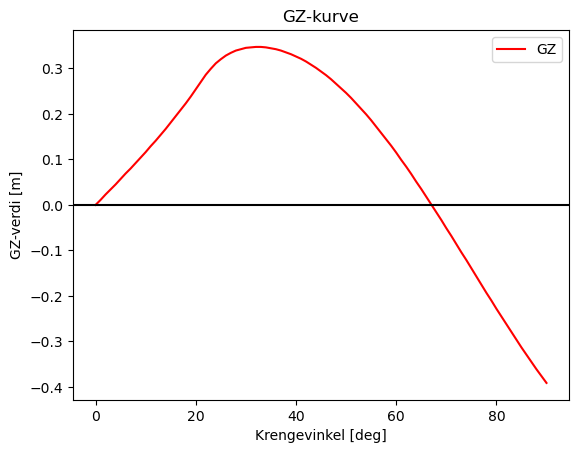

In [99]:
gz_data.plot(kind='line',y=gz_verdi,  color= 'red', label='GZ') #linjeplot, hva som er y-verdi, farge 
plt.xlabel('Krengevinkel [deg]', loc= 'center') 
plt.ylabel('GZ-verdi [m]')
plt.title('GZ-kurve')
plt.axhline(y=0, color='black', linestyle='-')
plt.show()

## Dataanalyse
Nå kan vi gå igang med å analysere dataene opp mot kravene til IMO. Det første kravet er uttrykt som: 

- Areal under GZ-kurven mellom 0-30 grader uttrykt ved $A_{GZ_{0-30}} < 0.055[mrad]$ 

Dette kan for enkle kurver regnes manuelt ved å stykke opp arealet i mindre deler bestående av trekanter og rektangler for så å summere de sammen. 

Arealet under en kurve kan bestemmes nøyaktig ved integrasjon $ \int_{a}^{b} f(x) \,dx$, men det fordrer at man vet $f(x)$ som beskriver kurven. I mangel av dette finnes det et par numeriske metoder som løser dette problemet ved kun å vite noen punkter langs kurven:
- [Trapesmetoden](https://no.wikipedia.org/wiki/Trapesintegrasjon)
- [Simpsonmetoden](https://no.wikipedia.org/wiki/Simpson-integrasjon)

Pandas dataframe gjør det her enkelt for oss: Vi kan finne summen av et interval (her mellom 0 og 30 grader) ved å bruke *.sum()* metoden:

In [100]:
areal_0_30 = gz_data[gz_verdi][0:30].sum()
print(areal_0_30) 


5.351


Siden dataen er presentert i meter og grader vil arealet bli $ meter \times grader$, mens kravet er oppgitt i $ meter \times radianer $. 

Vi har at forholdet mellom grader og radianer er uttrykt ved $360[deg] = 2 \times \pi [rad]$

In [101]:
print(areal_0_30 * 2* math.pi /360)



0.09339256827421658


Bruk f'string til å presenter resultatet og beregn $\%$-vis margin til kravet. 

## Litt mer avansert visualisering 
Et eksempel under på hvordan man kan skravere arealet man har regnet ut. Modifiser til også å gjelde de andre kriteriene! 

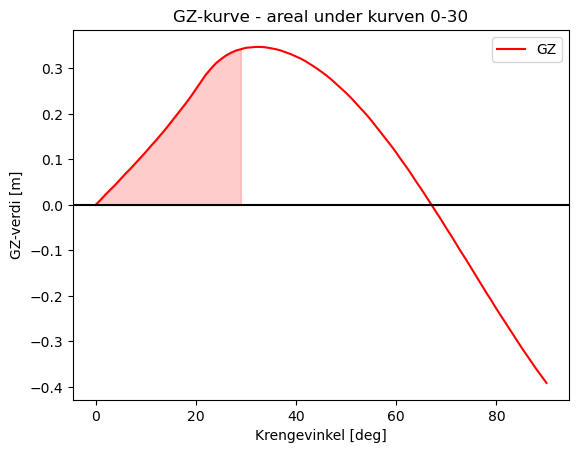

In [118]:
gz_data.plot(kind='line',y=gz_verdi,  color= 'red', label='GZ') #linjeplot, hva som er y-verdi, farge 
plt.xlabel('Krengevinkel [deg]', loc= 'center') 
plt.ylabel('GZ-verdi [m]')
plt.title('GZ-kurve - areal under kurven 0-30')
plt.axhline(y=0, color='black', linestyle='-')
plt.fill_between( x = gz_data[grader], y1= gz_data[gz_verdi], where = gz_data[grader].isin(gz_data[grader][0:30]), color= "r", alpha= 0.2)
plt.show()


## Lagre visualisering
Et plot kan lagres til en fil med følgende kode.  
 

In [120]:
plt.savefig('krenging-0-30-grader.png') #Dette tar seneste plot (plt.) som lagres på samme sted som jupyter notebooken ligger.
plt.close() 

Bruk eksemplene over til å sjekke de andre kravene: 
- Areal under GZ-kurven mellom 0-40 grader uttrykt ved $A_{GZ_{0-40}} < 0.09[mrad]$
- Areal under GZ-kurven mellom 30-40 grader uttrykt ved $A_{GZ_{30-40}} < 0.03[mrad]$

Og kravene til rettende arm. 